# NCAT Salaries Analysis

#### In this project, I will attempt to use Python to analyze real salaries for employees within NC A&T University. All of this data, is publicly accessible here: https://uncdm.northcarolina.edu/salaries/index.php.

# Task 1: Imports, Setup, and Data Summary

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from  matplotlib.ticker import FuncFormatter
from datetime import datetime

In [4]:
salaries = pd.read_excel('Salary Data Export.xlsx')
salaries.head()

,INSTITUTION NAME,LAST NAME,FIRST NAME,INIT,AGE,INITIAL HIRE DATE,JOB CATEGORY,EMPLOYEE ANNUAL BASE SALARY,EMPLOYEE HOME DEPARTMENT,PRIMARY WORKING TITLE
0,NCA&T,Abdelsalam,Mahmoud,NaN,31,"JUL 13, 2021",Assistant Professor,96255.0,Computer Science,Assistant Professor
1,NCA&T,Abiera,Rigel,B,50,"AUG 04, 2014",Electronic Equipment Mechanic,47266.0,One Card,Electronics Specialist
2,NCA&T,Abousaad,Shaymaa,M,41,"JUL 01, 2019","Research Professional, Biological Sciences",63653.0,Biology,Research Associate
3,NCA&T,Abu-Lebdeh,Taher,M,61,"AUG 14, 2000",Professor,99204.0,Civil Architect & Environ Engineer,Professor
4,NCA&T,Acree,Daniel,K,46,"AUG 12, 2002",Instructor,82158.0,Mechanical Engineering,Instructor W/A


In [5]:
salaries.describe()

,AGE,EMPLOYEE ANNUAL BASE SALARY
count,1542.000000,1542.000000
mean,49.719196,70973.068197
std,12.009768,36667.130593
min,22.000000,17393.000000
25%,41.000000,46005.500000
50%,50.000000,62530.000000
75%,59.000000,84731.250000
max,91.000000,417162.000000


In [6]:
salaries.rename(columns={'INSTITUTION NAME':'Institution','LAST NAME':'Last Name','FIRST NAME':'First Name','JOB CATEGORY':'Category',
                  'EMPLOYEE ANNUAL BASE SALARY':'Salary','EMPLOYEE HOME DEPARTMENT':'Department',
                  'PRIMARY WORKING TITLE':'Job Title','AGE':'Age'}, inplace=True)

salaries['Hire Year'] = pd.to_datetime(salaries['INITIAL HIRE DATE']).dt.year

current_year = datetime.now().year
salaries['Employment Length'] = current_year - salaries['Hire Year']

salaries.head()

,Institution,Last Name,First Name,INIT,Age,INITIAL HIRE DATE,Category,Salary,Department,Job Title,Hire Year,Employment Length
0,NCA&T,Abdelsalam,Mahmoud,NaN,31,"JUL 13, 2021",Assistant Professor,96255.0,Computer Science,Assistant Professor,2021,2
1,NCA&T,Abiera,Rigel,B,50,"AUG 04, 2014",Electronic Equipment Mechanic,47266.0,One Card,Electronics Specialist,2014,9
2,NCA&T,Abousaad,Shaymaa,M,41,"JUL 01, 2019","Research Professional, Biological Sciences",63653.0,Biology,Research Associate,2019,4
3,NCA&T,Abu-Lebdeh,Taher,M,61,"AUG 14, 2000",Professor,99204.0,Civil Architect & Environ Engineer,Professor,2000,23
4,NCA&T,Acree,Daniel,K,46,"AUG 12, 2002",Instructor,82158.0,Mechanical Engineering,Instructor W/A,2002,21


### Distribution of Overall Data

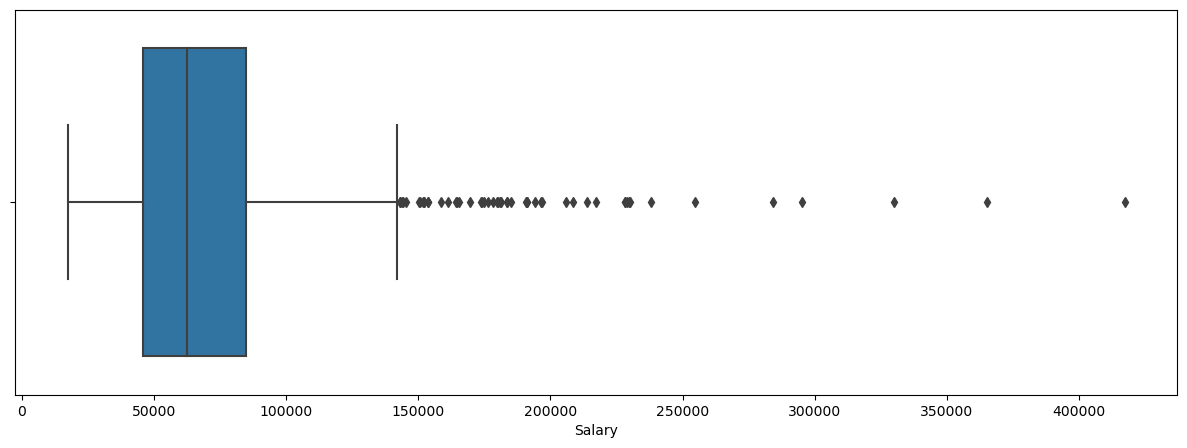

In [7]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Salary',data=salaries)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

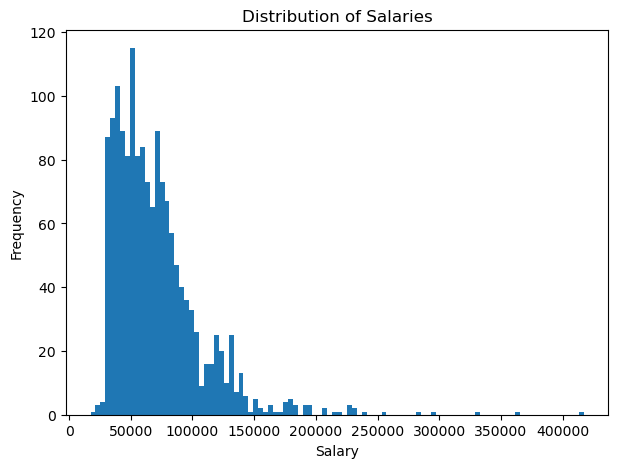

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.hist(salaries['Salary'], bins=100)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

## Task 2: Data Analysis

### Salary by Age

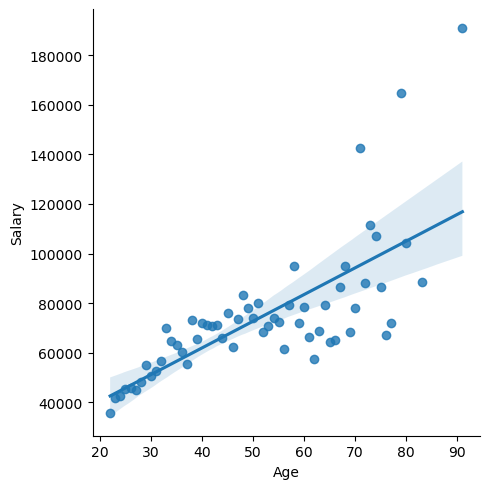

In [9]:
age_salary = salaries.groupby('Age')['Salary'].mean().reset_index()

sns.lmplot(x='Age',y='Salary',data=age_salary)

### Salary by Years of Experience

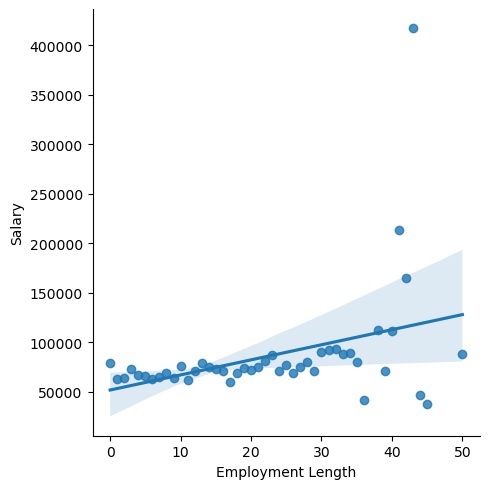

In [10]:
empl_len_salary = salaries.groupby('Employment Length')['Salary'].mean().reset_index()

sns.lmplot(x='Employment Length',y='Salary',data=empl_len_salary)

### Salary by Job Department

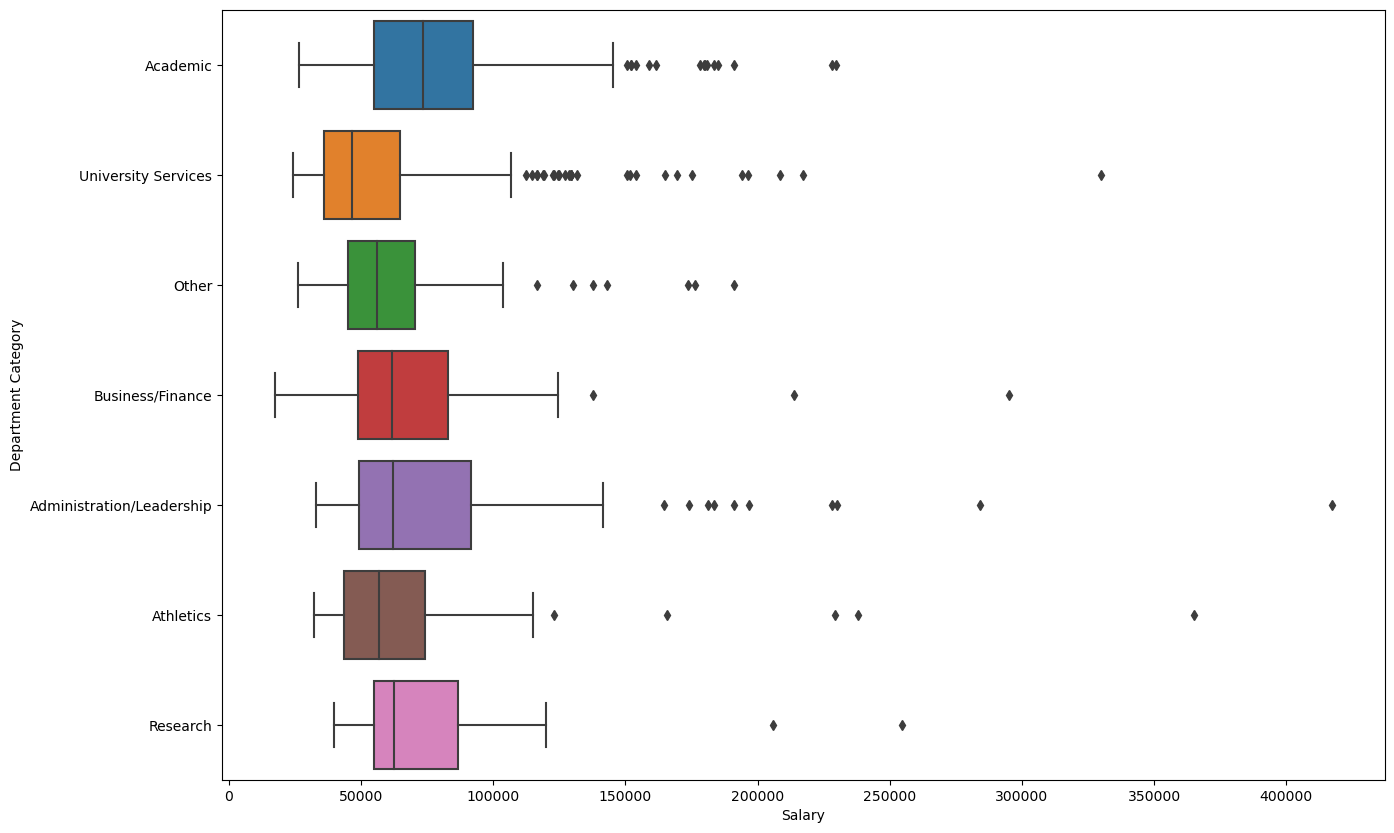

In [43]:
job_categories = {
    'Academic': ['Computer Science','Biology','Civil Architect & Environ Engineer','Mechanical Engineering','Economics',
'Animal Sciences','Chemical Biological & Bioengineerin','Industrial & Systems Engineering','Center for Academic Excellence',
'College of Ag & Environ Sciences','Physics','Kinesiology','Computer Systems Technology','Electrical & Computer Engineering',
'Sociology & Social Work','College of Engineering','Visual and Performing Arts','Library Services','College of Business & Economics',
'Leadership Studies & Adult Ed','The Graduate College','History and Political Science','Chemistry','Family and Consumer Sciences',
'Computational Science & Engineering','Management','Department of Built Environment','Journalism and Mass Comm',
'Liberal Studies Department','Psychology','English','Educator Preparation','Admin and Instructional Services',
'College of Education','Mathematics','Music Dept','College of Science and Technology','Criminal Justice',
'Graphic Design Technology','Speech Communication','School of Nursing','Marketing & Supply Chain Management',
'Applied Engineering Technology','Aerospace Studies','College of Health & Human Sciences','Masters of Computational Science',
'College of Arts Humanities, Soc Sci','Applied Science and Technology','Military Science','Transportation Institute',
'Agribusiness Econ Agriscience','JSNN: Nanoengineering','Accounting and Finance','Natural Resources & Environ Design'
],
    'University Services': ['One Card','Counseling','Student Affairs','Counseling Services','Career Services',
'Provost and VC for Academic Affairs','University Registrar','Housing and Residence Life','Student Support Services',
'Honors Program','Dean of Students','Dept of Accessibility Resources','Student Development','Student Organizations',
'Police Administration','Health Services','Veteran & Disability Services','Campus Enterprises','Office of International Affairs',
'Information Technology Services ITS','Facilities','Parking Services','University Ticket Office','Student Stores'
],
    'Athletics': ['Men\'s Basketball','Football','Women\'s Basketball','Women\'s Volleyball','Intramural Sports','Intercollegiate Athletics'
],
    'Business/Finance': ['Procurement Services','Internal Audit','Business and Finance','Accounting','Comptroller',
'Academic Budget & Personnel','Budget'
],
    'Research': ['Ctr for Energy Research & Training','Research & Economic Developmnt','Agricultural Research','Environmental Health and Safety'
],
    'Administration/Leadership': ['Strategic Partnership & Economic Dv','Special Assistant to Provost',
'Division of University Advancement','Financial Aid','Enrollment Mgmnt and Admissions','Business Info Systems & Analytics',
'Human Resources','Institutional Research','Planning Assessment & Research','N C A&T Real Estate Foundation','Contracts & Grants',
'Treasurer','Payroll','University Relations','Title III','Chancellor','Legal Counsel'
],
    'Other': ['Mattye Reed Heritage Center','E-Learning Systems/CI','Upward Bound','University Bands','Laboratory School',
'Agricultural Extension','Cntr of Excellence-Post Harvest Tec','Summer Sch & Outreach Programs','WNAA 90.1 FM Radio Station',
'Memorial Union','Physician Assistant Program','Physical Plant','JSNN: Budget Office'
]
}
def assign_category(job_category):
    for category, keywords in job_categories.items():
        for keyword in keywords:
                if keyword.lower() == job_category.lower():
                    return category
    return 'Other'

def assign_number(job_category):
    categories = ['Academic','University Services','Athletics','Business/Finance','Research','Administration/Leadership','Other']
    for category, keywords in job_categories.items():
        for keyword in keywords:
                if keyword.lower() == job_category.lower():
                    return categories.index(category)

salaries['Department Category'] = salaries['Department'].apply(assign_category) 
salaries['Numerical Department Category'] = salaries['Department'].apply(assign_number)

plt.figure(figsize=(15,10))
sns.boxplot(x='Salary', y='Department Category', data=salaries)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.show()

### Salary by Academic Department

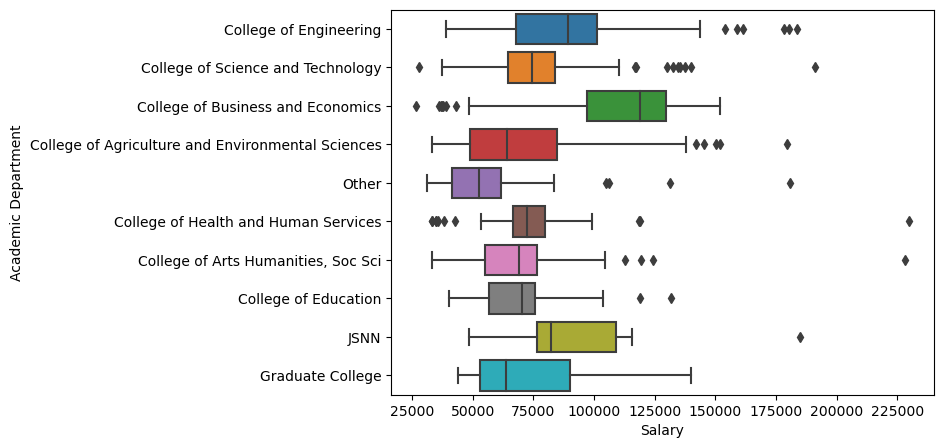

In [12]:
academic_depts = {
    'College of Engineering': ['Civil Architect & Environ Engineer','Mechanical Engineering','Chemical Biological & Bioengineerin',
'Industrial & Systems Engineering','Electrical & Computer Engineering','College of Engineering','Computational Science & Engineering',
'Computer Science','Masters of Computational Science'],
    
'College of Health and Human Services': ['Kinesiology','Sociology & Social Work','Speech Communication','School of Nursing',
'Psychology','College of Health & Human Sciences'],
    
'College of Business and Economics': ['Economics','College of Business & Economics','Management','Accounting and Finance',
'Marketing & Supply Chain Management'],
    
'College of Agriculture and Environmental Sciences': ['Family and Consumer Sciences','Natural Resources & Environ Design',
'College of Ag & Environ Sciences','Agribusiness Econ Agriscience','Animal Sciences'],
    
'College of Education': ['College of Education','Leadership Studies & Adult Ed','Educator Preparation'],
    
'College of Science and Technology': ['Biology','Physics','Computer Systems Technology','Chemistry',
'Department of Built Environment','Mathematics','College of Science and Technology','Graphic Design Technology',
'Applied Engineering Technology','Applied Science and Technology'],
    
'College of Arts Humanities, Soc Sci': ['Visual and Performing Arts','History and Political Science','Journalism and Mass Comm',
'Liberal Studies Department','English','Music Dept','Criminal Justice','College of Arts Humanities, Soc Sci'],
    
'JSNN': ['JSNN: Nanoengineering'],
    
'Graduate College': ['The Graduate College'],
    
'Other': ['Center for Academic Excellence','Admin and Instructional Services','Library Services']
}

def assign_category(academic_category):
    for category, keywords in academic_depts.items():
        for keyword in keywords:
            if keyword.lower() == academic_category.lower():
                return category
    return 'Other'

condition = (salaries['Department Category'] == 'Academic')
academic_dept_salaries = salaries[condition]
salaries['Academic Department'] = academic_dept_salaries['Department'].apply(assign_category) 

plt.figure(figsize=(7,5))
sns.boxplot(x='Salary', y='Academic Department', data=salaries)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.show()

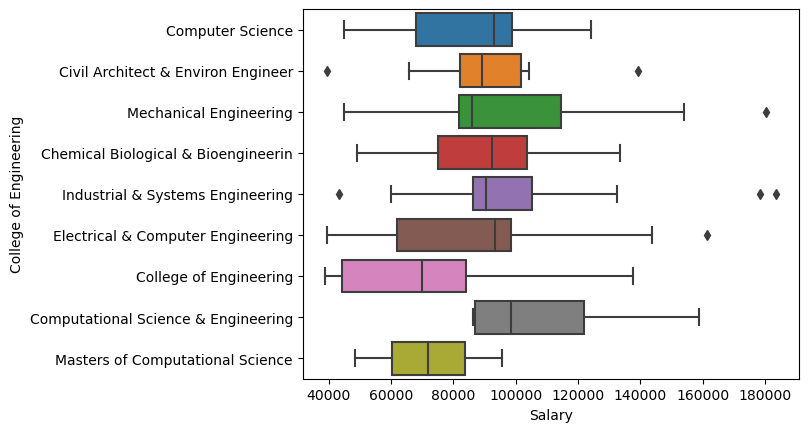

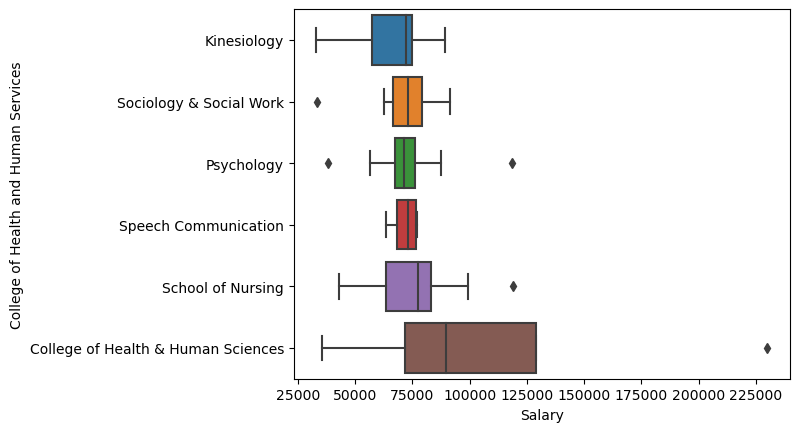

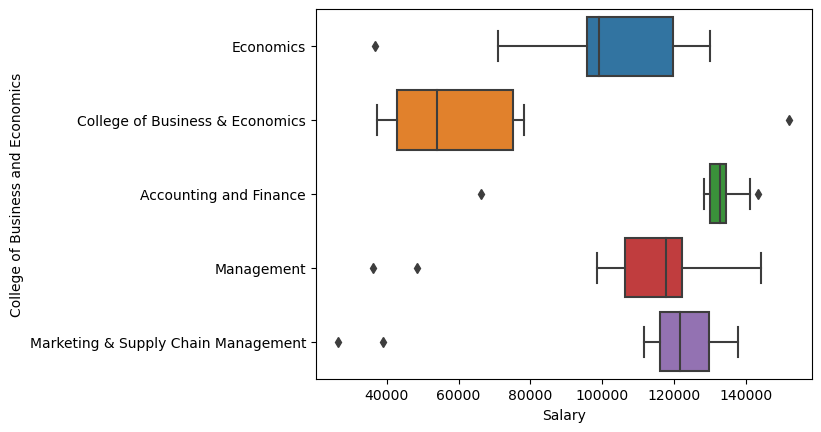

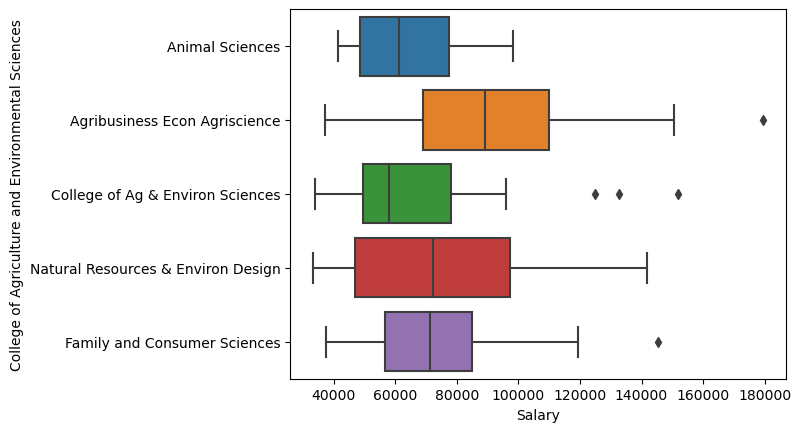

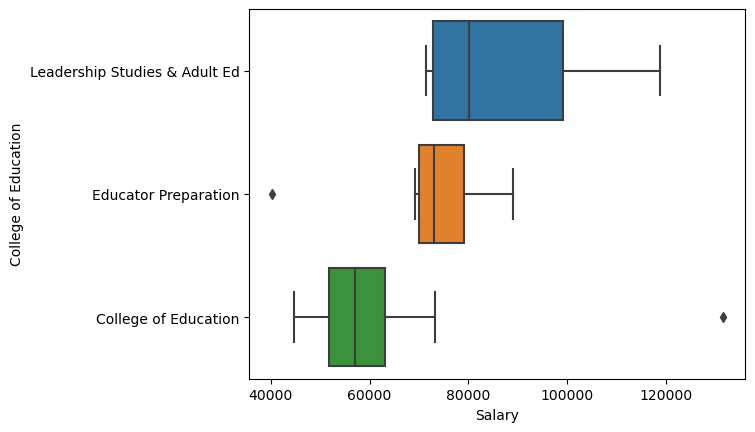

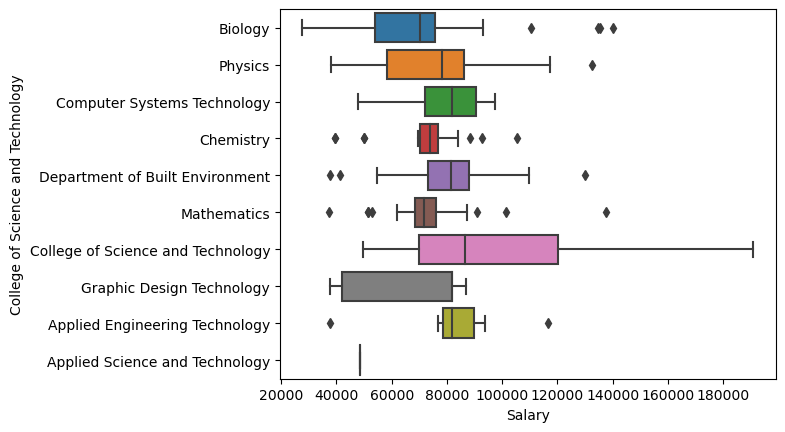

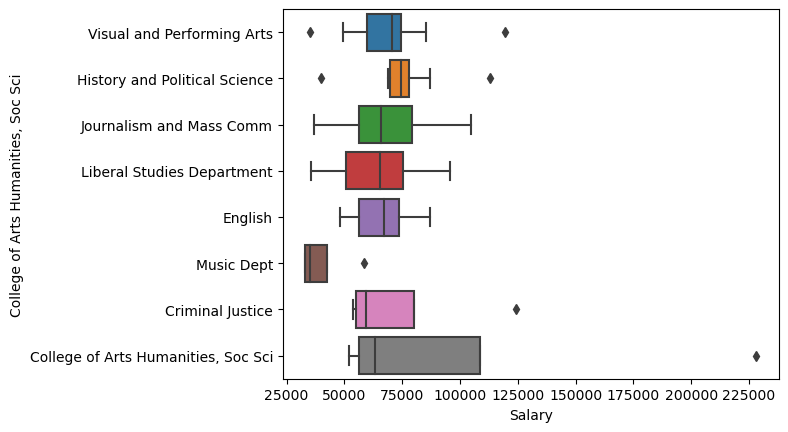

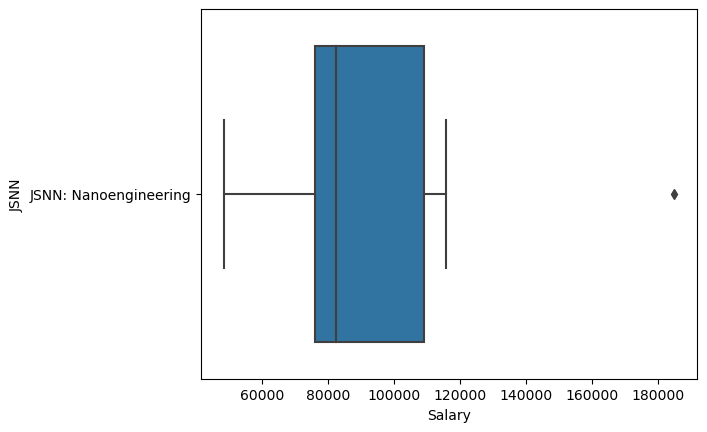

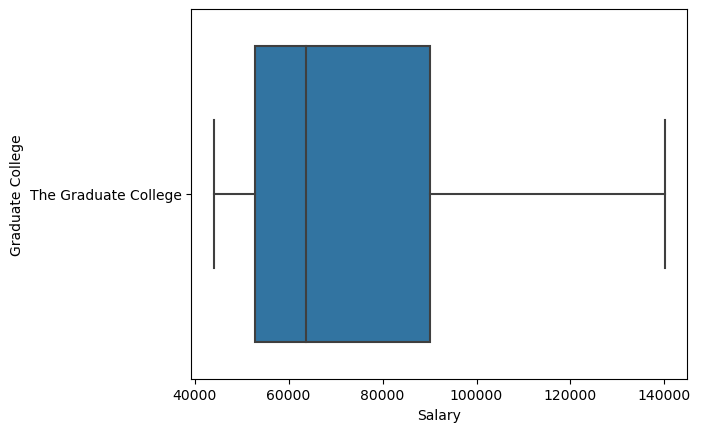

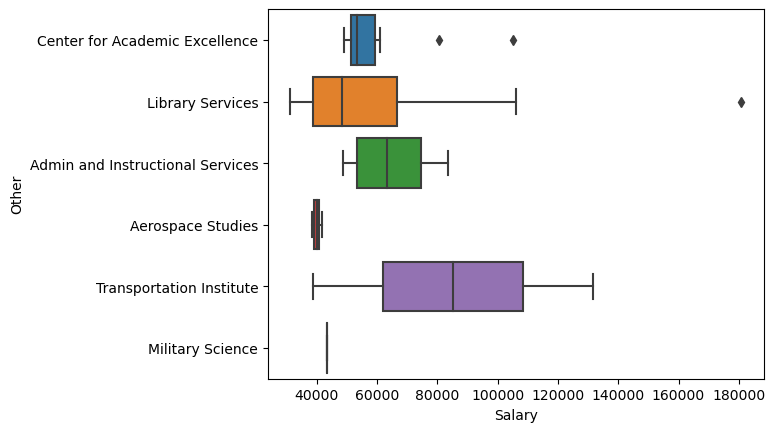

In [13]:
for college, department in academic_depts.items():
    college_dept_salaries = salaries[(salaries['Department Category'] == 'Academic') & (salaries['Academic Department'] == college)]
    sns.boxplot(x='Salary',y='Department',data=college_dept_salaries)
    plt.ylabel(college)
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    plt.show()


           

### Heatmap Overall

<AxesSubplot:>

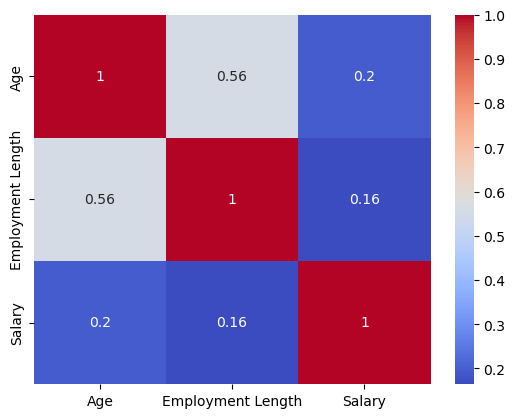

In [16]:
variables = ['Age', 'Employment Length','Salary']

data = salaries[variables]

data = data.dropna()


corr_matrix = data.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

### Heatmap By Job Department

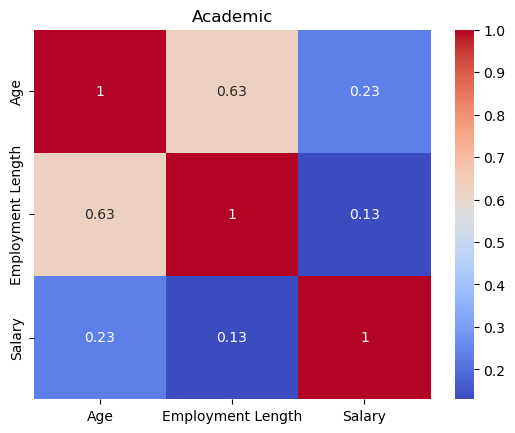

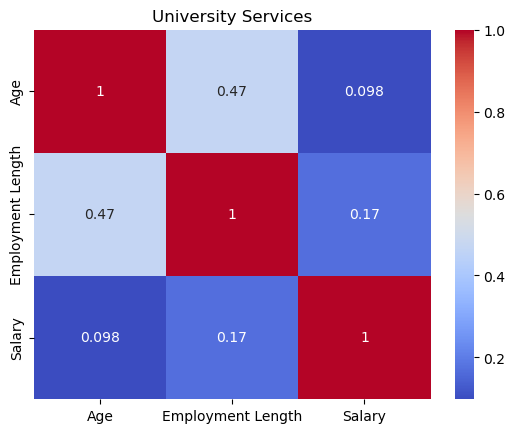

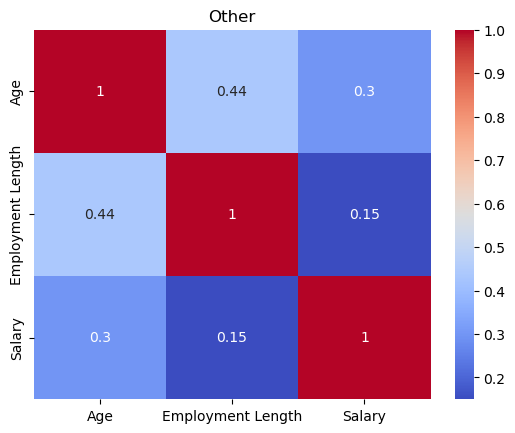

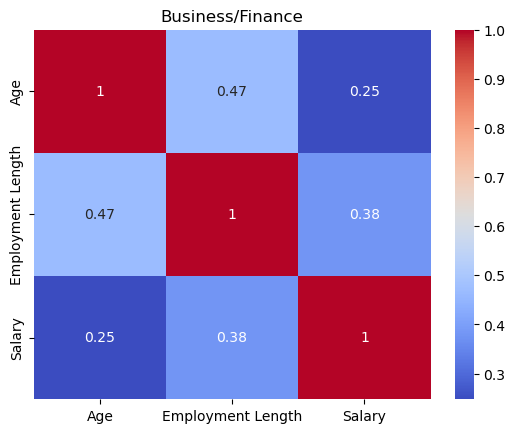

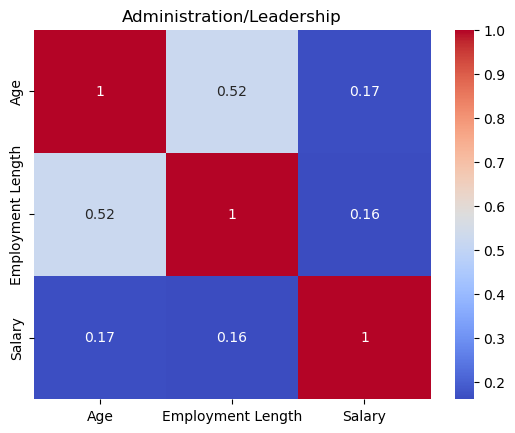

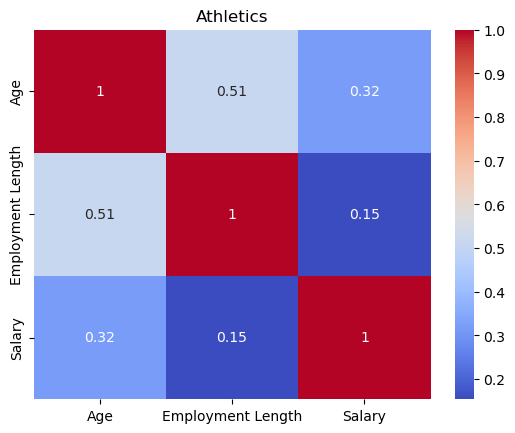

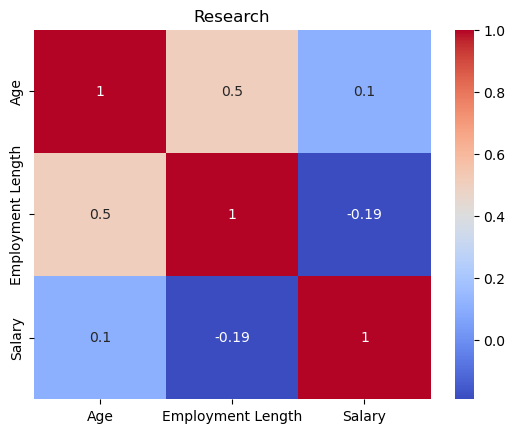

In [48]:
variables = ['Age', 'Employment Length', 'Salary','Department Category']


data = salaries[variables].dropna()


for job_category in data['Department Category'].unique():
    job_data = data[data['Department Category'] == job_category]
    corr_matrix = job_data.corr()
    sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True)
    plt.title(job_category)
    plt.show()

## Task 3: Building a Simple Machine Learning Model

### Using SkLearn Train Test Split to Create Machine Learning Model (Supervised Learning)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = salaries.loc[:,['Age','Employment Length','Numerical Department Category']].values
y = salaries.loc[:,'Salary'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [46]:
reg = LinearRegression(fit_intercept=True)
reg.fit(x_train, y_train)

score = reg.score(x_test, y_test)
print(score)

0.03838359847467232


#### Given that the linear regression score (r² - Coefficient of Determination) is close to 0, this indicates that there is a very weak correlation/fit between age, employment length, and department category in relation to salary.